# Deep Learning Model - Keras
## Guide

In [1]:
guide = "https://www.kaggle.com/code/devanshiipatel/body-performance-classification-with-deep-learning"

## Make necessary imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt     # Use matplotlib==3.6
import seaborn as sns
import opendatasets as od
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

import keras
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

c:\Users\henri\anaconda3\envs\ML-Pipeline\Lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\henri\anaconda3\envs\ML-Pipeline\Lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
c:\Users\henri\anaconda3\envs\ML-Pipeline\Lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-246-g3d31191b-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


## Importing data
### Import data

In [2]:
od.download("https://www.kaggle.com/datasets/kukuroo3/body-performance-dataset")   # Got error, so I downloaded it manually

Skipping, found downloaded files in ".\body-performance-dataset" (use force=True to force download)


### Read data

In [3]:
file = 'body-performance-dataset/bodyPerformance.csv'
df = pd.read_csv(file)
df.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


### Preprocess

In [8]:
# Find the shape of dataset
df.shape

(13393, 12)

In [9]:
# Find the datatype of each attribute
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      13393 non-null  float64
 1   gender                   13393 non-null  object 
 2   height_cm                13393 non-null  float64
 3   weight_kg                13393 non-null  float64
 4   body fat_%               13393 non-null  float64
 5   diastolic                13393 non-null  float64
 6   systolic                 13393 non-null  float64
 7   gripForce                13393 non-null  float64
 8   sit and bend forward_cm  13393 non-null  float64
 9   sit-ups counts           13393 non-null  float64
 10  broad jump_cm            13393 non-null  float64
 11  class                    13393 non-null  object 
dtypes: float64(10), object(2)
memory usage: 1.2+ MB


**Attribute Description:**
1. age - age of individual between 20~64
2. gender - gender of individual Male(M) or Female(F)
3. height_cm - height in cm
4. weight_kg - weight in kilograms
5. body fat_% - body fat in percentage
6. diastolic - diastolic blood pressure
7. systolic - systolic blood pressure
8. gripForce -
9. sit and bend forward_cm -
10. sit-ups counts - count of sit-ups
11. broad jump_cm - distance covered in broad jump in cm
12. class - A, B, C, D where A is best

In [10]:
# Statistics for numeric attributes
df.describe()

,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm
count,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000
mean,36.775106,168.559807,67.447316,23.240165,78.796842,130.234817,36.963877,15.209268,39.771224,190.129627
std,13.625639,8.426583,11.949666,7.256844,10.742033,14.713954,10.624864,8.456677,14.276698,39.868000
min,21.000000,125.000000,26.300000,3.000000,0.000000,0.000000,0.000000,-25.000000,0.000000,0.000000
25%,25.000000,162.400000,58.200000,18.000000,71.000000,120.000000,27.500000,10.900000,30.000000,162.000000
50%,32.000000,169.200000,67.400000,22.800000,79.000000,130.000000,37.900000,16.200000,41.000000,193.000000
75%,48.000000,174.800000,75.300000,28.000000,86.000000,141.000000,45.200000,20.700000,50.000000,221.000000
max,64.000000,193.800000,138.100000,78.400000,156.200000,201.000000,70.500000,213.000000,80.000000,303.000000


**Simple statistics like count, mean, min, max, etc is calculated for attributes having numeric datatype.**

**Some of the conclusions drawn from the above table are:**

- The average age is 36 whereas the median age is 32.
- The median height is 169.2 cm and the median weight is 67.4 kg.
- The average diastolic pressure is 78.79 and average systolic pressure is 130.23.
- The maximum number of sit-up count is 80.
- The minimum distance in broad jump is 39.868 cm and maximum distance is 303 cm.

In [11]:
# Statistics for object attributes
df.describe(include="object")

,gender,class
count,13393,13393
unique,2,4
top,M,C
freq,8467,3349


**The statistics displayed for the attributes of 'object' datatype is different from the one displayed for numeric datatypes.**

**Some of the conclusions drawn from the above table are:**
- There are 2 unique gender and 4 unique classes in the dataset.
- The top gender is M(Male) occuring 8467 times.
- The top class is C occuring 3349 times.

#### Duplicates

In [14]:
# Check for duplicates
duplicate = df[df.duplicated()]
duplicate

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
12473,27.0,F,157.0,49.1,30.7,70.0,86.0,27.7,19.7,51.0,167.0,A


The dataset has one **duplicate** record.

In [5]:
# Remove duplicate records except the first occurence
df.drop_duplicates(inplace=True)

In [16]:
# Again check if any duplicate records are left
duplicate = df[df.duplicated()] 
duplicate

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class


Hence, all duplicate records are removed.

#### Missing values

In [4]:
# Find the total number of missing values in each column
df.isna().sum()

age                        0
gender                     0
height_cm                  0
weight_kg                  0
body fat_%                 0
diastolic                  0
systolic                   0
gripForce                  0
sit and bend forward_cm    0
sit-ups counts             0
broad jump_cm              0
class                      0
dtype: int64

There are no missing records present.

In [6]:
# Checking the shape again
df.shape

(13392, 12)

After removing duplicate values and checking for missing values there are 13,392 records in dataset.

## Exploratory Data Analysis (EDA)

In [7]:
plt.style.use('seaborn')

C:\Users\henri\AppData\Local\Temp\ipykernel_15680\240305066.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [11]:
# Plot Correlation Matrix
corr = df.corr()
# corr.style.background_gradient(cmap='PuBu').set_precision(2)  # This is not working, issue with library
corr

C:\Users\henri\AppData\Local\Temp\ipykernel_15680\2684924510.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm
age,1.000000,-0.294080,-0.100059,0.242372,0.158471,0.211082,-0.179638,-0.070007,-0.544562,-0.435217
height_cm,-0.294080,1.000000,0.734868,-0.515392,0.145863,0.209963,0.735007,-0.221933,0.500551,0.674586
weight_kg,-0.100059,0.734868,1.000000,-0.083958,0.262252,0.338743,0.700100,-0.296217,0.295022,0.479546
body fat_%,0.242372,-0.515392,-0.083958,1.000000,0.048125,-0.030157,-0.541758,-0.071269,-0.609010,-0.673264
diastolic,0.158471,0.145863,0.262252,0.048125,1.000000,0.676370,0.202020,-0.072068,0.016596,0.097211
systolic,0.211082,0.209963,0.338743,-0.030157,0.676370,1.000000,0.285921,-0.082344,0.056473,0.152817
gripForce,-0.179638,0.735007,0.700100,-0.541758,0.202020,0.285921,1.000000,-0.112546,0.576750,0.746846
sit and bend forward_cm,-0.070007,-0.221933,-0.296217,-0.071269,-0.072068,-0.082344,-0.112546,1.000000,0.177128,0.026511
sit-ups counts,-0.544562,0.500551,0.295022,-0.609010,0.016596,0.056473,0.576750,0.177128,1.000000,0.748334
broad jump_cm,-0.435217,0.674586,0.479546,-0.673264,0.097211,0.152817,0.746846,0.026511,0.748334,1.000000


**Observation:**
- There is a negative correlation between `age` and `sit-ups counts` of -0.54 which means that young people can do more sit-ups than old people.
- There is a negative correlation between `age` and `broad jump_cm` of -0.44 which means that young people can cover more distance in jump than old people.
- There is a positive correlation of 0.73 between `height_cm` and `weight_kg` attributes and a negative correlation of -0.52 between `height_cm` and `body fat_%` which means that tall people have less body fat and short people have more.
- `height_cm` and `weight_kg` have a positive correlation with `gripForce`, `sit-ups counts` and `broad jump_cm`.
- `body fat_%` has a negative correlation with `gripForce`, `sit-ups counts` and `broad jump_cm` which means that people with less fat have high grip force, can do more sit-ups and cover a larger distance in broad jump.
- `diastolic` and `systolic` have a positive correlation of 0.68 with each other.

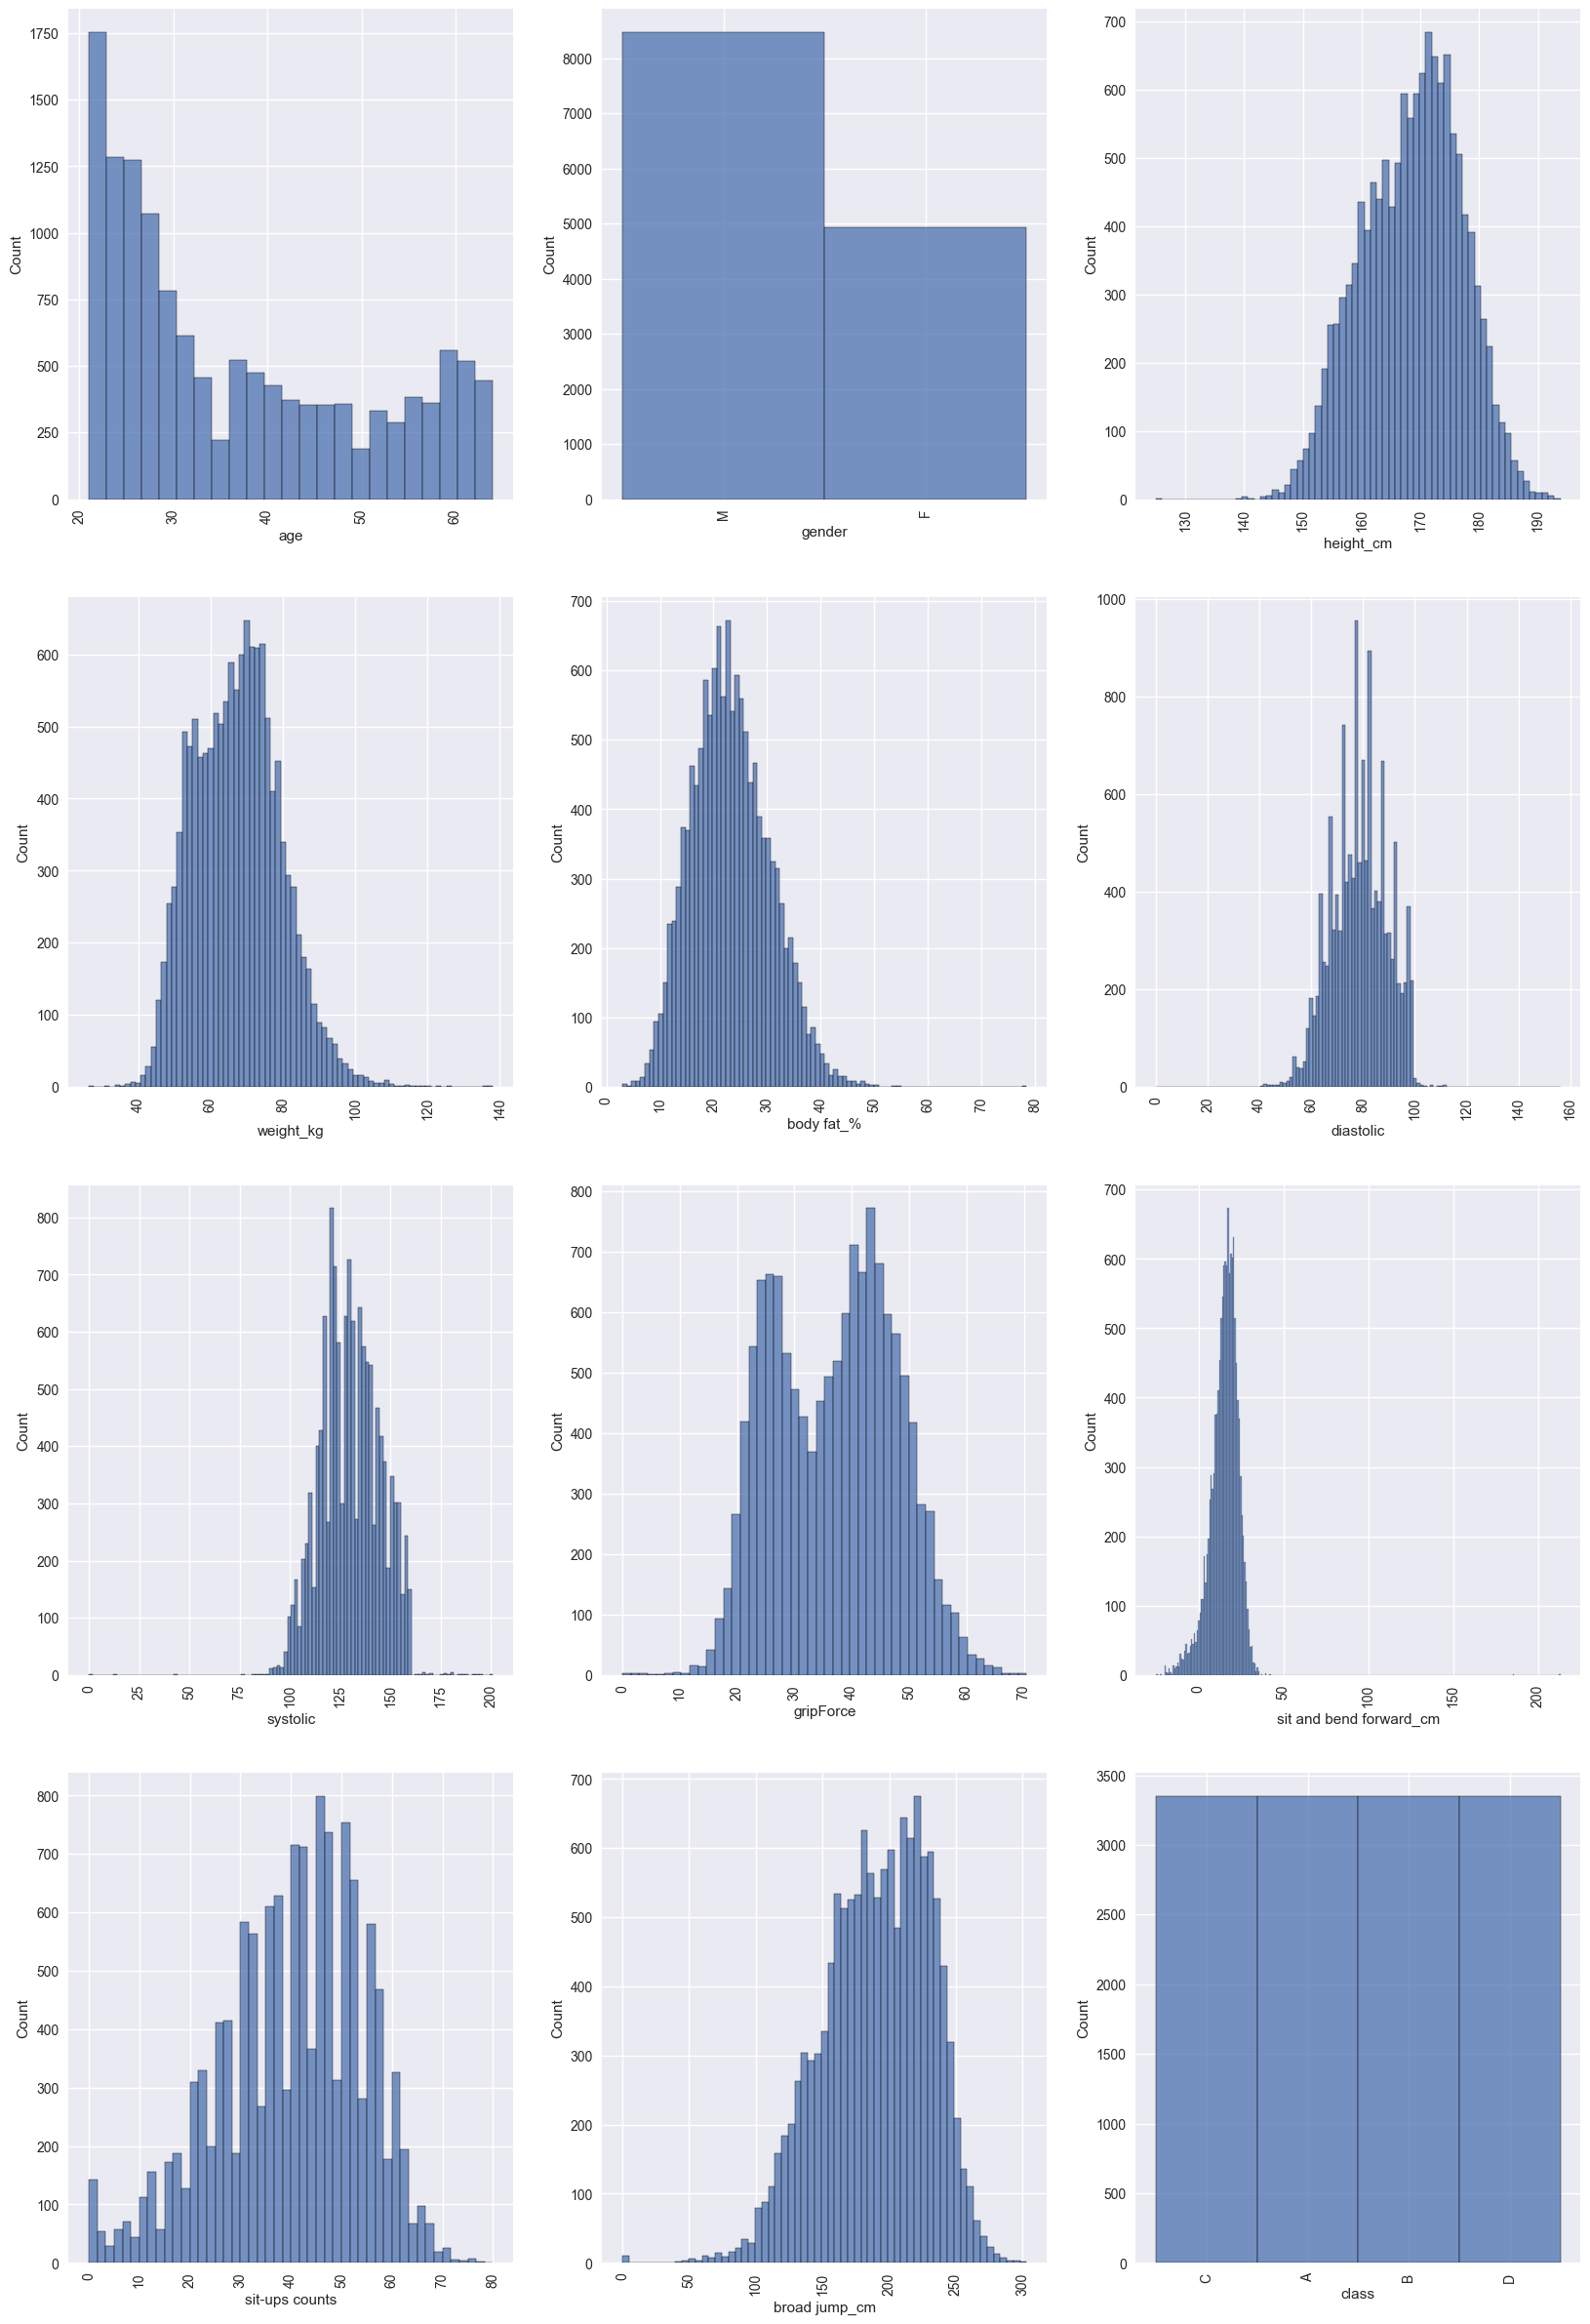

In [12]:
# Plotting all the attributes w.r.t its count
fig, ax = plt.subplots(4, 3, figsize=(20, 30))
for variable, subplot in zip(df, ax.flatten()):
    sns.histplot(df[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

## Model

### Preprocessing

In [13]:
# Replace categorical variables with integers
df = df.replace({'M':0, 'F':1})
df = df.replace({'A':1,'B':2,'C':3,'D':4})

In [14]:
X = df.iloc[:, :-1]    # Independent variable       Means: All rows, All columns except last column
y = df.iloc[:, -1]     # Dependent variable         Means: All rows, Last column

# Encode class values as integers
encoder = LabelEncoder()
encoder.fit(y)
encoded_Y = encoder.transform(y)

# Convert integers to dummy variables (i.e. one hot encoded)
dummy_y = to_categorical(encoded_Y)

In [15]:
dummy_y

array([[0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       ...,
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.]], dtype=float32)

### Split the dataset into training and testing set

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, dummy_y, test_size=0.2, random_state=0)

print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (10713, 11)
X_test: (2679, 11)
y_train: (10713, 4)
y_test: (2679, 4)


### Building ANN

In [17]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units=20, kernel_initializer='he_uniform', activation='relu', input_dim = 11))     # units means no. of neurons in hidden layer

# Adding the second hidden layer
classifier.add(Dense(units=35, kernel_initializer='he_uniform', activation='relu'))

# Adding the third hidden layer
classifier.add(Dense(units=50, kernel_initializer='he_uniform', activation='relu'))

# Adding the fourth hidden layer
classifier.add(Dense(units=65, kernel_initializer='he_uniform', activation='relu'))
classifier.add(Dropout(0.2))

# Adding the fifth hidden layer
classifier.add(Dense(units=80, kernel_initializer='he_uniform', activation='relu'))
classifier.add(Dropout(0.2))

# Adding the sixth hidden layer
classifier.add(Dense(units=55, kernel_initializer='he_uniform', activation='relu'))

# Adding the seventh hidden layer
classifier.add(Dense(units=35, kernel_initializer='he_uniform', activation='relu'))

# Adding the output layer
classifier.add(Dense(units=4, activation='softmax'))  # kernel_initializer='glorot_uniform', 

# Compiling the ANN
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                240       
                                                                 
 dense_1 (Dense)             (None, 35)                735       
                                                                 
 dense_2 (Dense)             (None, 50)                1800      
                                                                 
 dense_3 (Dense)             (None, 65)                3315      
                                                                 
 dropout (Dropout)           (None, 65)                0         
                                                                 
 dense_4 (Dense)             (None, 80)                5280      
                                                                 
 dropout_1 (Dropout)         (None, 80)                0

### Model training

In [19]:
# Fitting the ANN to the Training set
model_history = classifier.fit(X_train, y_train, validation_split=0.33, batch_size=10, epochs=150)

Epoch 1/150


718/718 [==============================] - 5s 3ms/step - loss: 4.8994 - accuracy: 0.3107 - val_loss: 1.2804 - val_accuracy: 0.3818
Epoch 2/150
718/718 [==============================] - 3s 4ms/step - loss: 1.2207 - accuracy: 0.4116 - val_loss: 1.0582 - val_accuracy: 0.5139
Epoch 3/150
718/718 [==============================] - 2s 3ms/step - loss: 1.1130 - accuracy: 0.4740 - val_loss: 1.0993 - val_accuracy: 0.5133
Epoch 4/150
718/718 [==============================] - 2s 3ms/step - loss: 1.0630 - accuracy: 0.5041 - val_loss: 0.9342 - val_accuracy: 0.5735
Epoch 5/150
718/718 [==============================] - 2s 3ms/step - loss: 1.0047 - accuracy: 0.5324 - val_loss: 0.9386 - val_accuracy: 0.5645
Epoch 6/150
718/718 [==============================] - 3s 4ms/step - loss: 0.9870 - accuracy: 0.5493 - val_loss: 0.9610 - val_accuracy: 0.5192
Epoch 7/150
718/718 [==============================] - 2s 3ms/step - loss: 0.9807 - accuracy: 0.5487 - val_loss: 0.9542 - val_accuracy: 0.57

### Model visualization

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


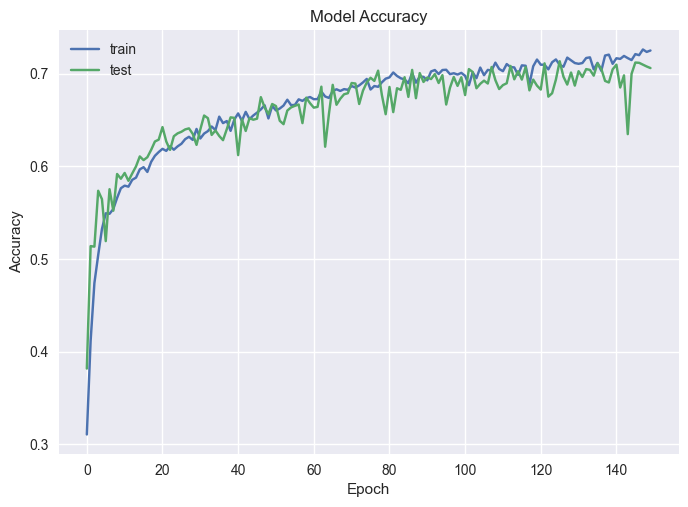

In [31]:
# List all data in history
print(model_history.history.keys())

# Summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

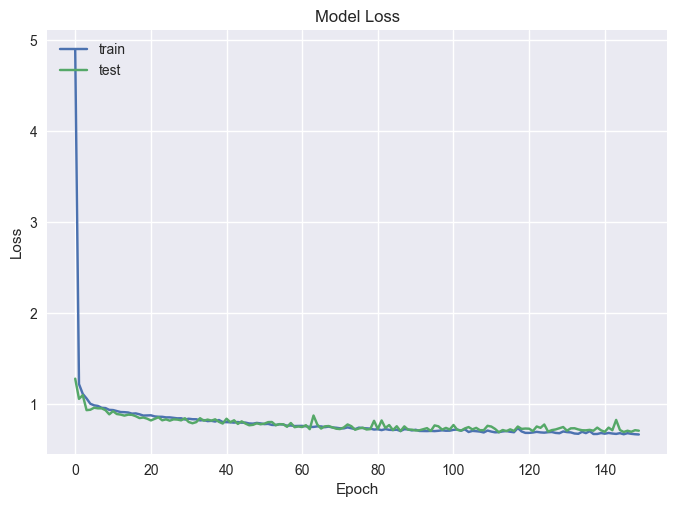

In [32]:
# Summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Model evaluation

In [38]:
# Calculating score
score = classifier.evaluate(X_test, y_test)
score

84/84 [==============================] - 0s 2ms/step - loss: 0.7199 - accuracy: 0.7107


[0.7198764681816101, 0.7107129693031311]

In [39]:
# Predicting on test data
y_pred = classifier.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)  # axis=1 means that the operation is performed across the rows of y_pred, i.e. for each row [x, y, z, h], the highest value (probability) is selected, where [x, y, z, h] corresponds to the probabilities of each class [A, B, C, D]
y_test = np.argmax(y_test, axis=1)

84/84 [==============================] - 0s 2ms/step


In [40]:
# Accuracy
accuracy_score(y_pred, y_test)

0.7107129525942516

Text(0.5, 1.0, 'Confusion Matrix')

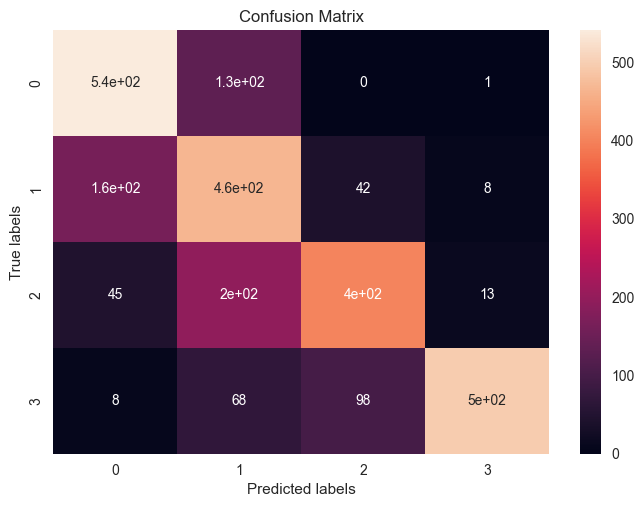

In [36]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax=ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')